In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('data/combined_data/combined_data.csv')

In [3]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,21,27.6,14.6,61,0,6,2.2,3.5,284.795833
1,21.6,27.7,17,59,0,6.8,2,3.5,239.695455
2,22.3,29,16.1,48,0,6.9,2.8,3.5,182.187500
3,20.9,29,16,66,0,5.5,2.2,3.5,264.064286
4,20.9,27.8,16,62,0,6.3,3,5.4,223.208333


In [4]:
combined_data.dtypes

T          object
TM         object
Tm         object
H          object
PP         object
VV         object
V          object
VM         object
PM_2_5    float64
dtype: object

In [5]:
for col in combined_data.columns[:-1]:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

In [6]:
combined_data.dtypes

T         float64
TM        float64
Tm        float64
H         float64
PP        float64
VV        float64
V         float64
VM        float64
PM_2_5    float64
dtype: object

In [7]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,21.0,27.6,14.6,61.0,0.0,6.0,2.2,3.5,284.795833
1,21.6,27.7,17.0,59.0,0.0,6.8,2.0,3.5,239.695455
2,22.3,29.0,16.1,48.0,0.0,6.9,2.8,3.5,182.187500
3,20.9,29.0,16.0,66.0,0.0,5.5,2.2,3.5,264.064286
4,20.9,27.8,16.0,62.0,0.0,6.3,3.0,5.4,223.208333


In [8]:
combined_data.isna().sum()

T         18
TM        18
Tm        18
H         18
PP        47
VV        18
V         18
VM        24
PM_2_5     0
dtype: int64

<AxesSubplot: >

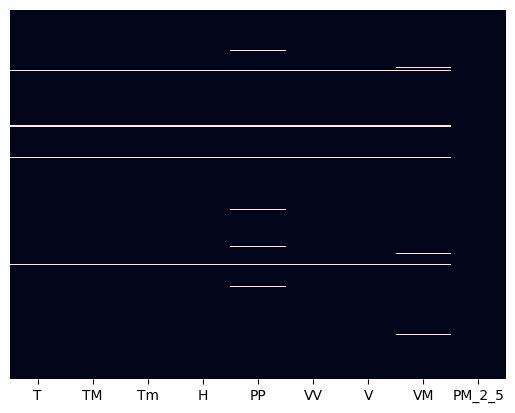

In [9]:
sns.heatmap(combined_data.isna(), yticklabels=False, cbar=False)

In [10]:
combined_data = combined_data.dropna()

<AxesSubplot: >

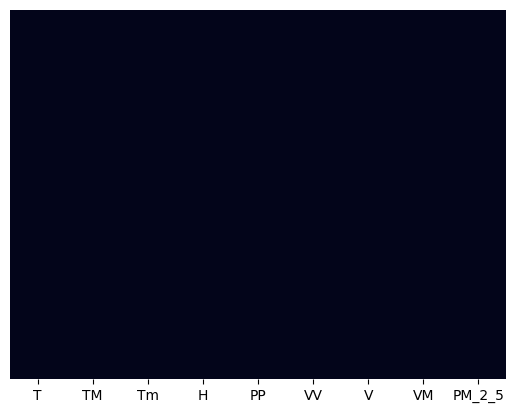

In [11]:
sns.heatmap(combined_data.isna(), yticklabels=False, cbar=False)

In [12]:
combined_data.shape

(1078, 9)

In [13]:
combined_data['PM_2_5'].value_counts()

0.000000      36
79.000000      6
43.666667      5
108.000000     5
38.250000      5
              ..
80.208333      1
92.916667      1
94.333333      1
52.625000      1
441.416667     1
Name: PM_2_5, Length: 612, dtype: int64

In [14]:
# Drop rows where PM2.5 is 0.0
combined_data = combined_data[combined_data['PM_2_5'] != 0.0]

In [15]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,21.0,27.6,14.6,61.0,0.0,6.0,2.2,3.5,284.795833
1,21.6,27.7,17.0,59.0,0.0,6.8,2.0,3.5,239.695455
2,22.3,29.0,16.1,48.0,0.0,6.9,2.8,3.5,182.187500
3,20.9,29.0,16.0,66.0,0.0,5.5,2.2,3.5,264.064286
4,20.9,27.8,16.0,62.0,0.0,6.3,3.0,5.4,223.208333


In [16]:
combined_data.shape

(1042, 9)

In [17]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [18]:
sns.pairplot(combined_data)

In [19]:
combined_data.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
T,1.000000,0.852645,0.688650,-0.503010,-0.073524,0.378776,-0.204960,-0.087637,-0.379939
TM,0.852645,1.000000,0.395225,-0.664802,-0.065308,0.357372,-0.319439,-0.167917,-0.223088
Tm,0.688650,0.395225,1.000000,0.194090,0.049221,0.054877,0.066984,0.062041,-0.502202
H,-0.503010,-0.664802,0.194090,1.000000,0.229211,-0.414820,0.295650,0.174931,-0.123533
PP,-0.073524,-0.065308,0.049221,0.229211,1.000000,-0.092324,-0.014407,-0.006839,-0.137149
VV,0.378776,0.357372,0.054877,-0.414820,-0.092324,1.000000,-0.082290,-0.076309,-0.089485
V,-0.204960,-0.319439,0.066984,0.295650,-0.014407,-0.082290,1.000000,0.541716,-0.199252
VM,-0.087637,-0.167917,0.062041,0.174931,-0.006839,-0.076309,0.541716,1.000000,-0.161871
PM_2_5,-0.379939,-0.223088,-0.502202,-0.123533,-0.137149,-0.089485,-0.199252,-0.161871,1.000000


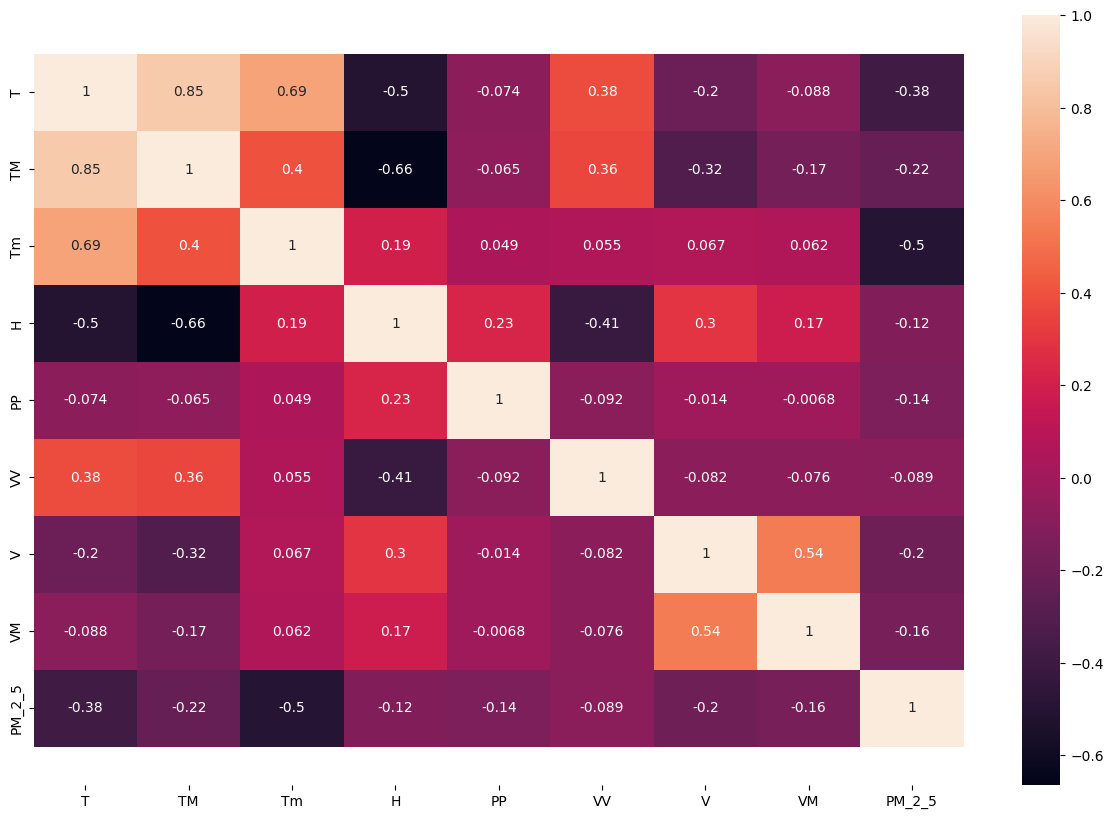

In [20]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(combined_data.corr(), annot=True)
# need this since due to bug in current version of matplotlib and seaborn
# top and bottom rows are cut in half
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selector = ExtraTreesRegressor()
feature_selector.fit(X,y)

ExtraTreesRegressor()

In [22]:
feature_selector.feature_importances_


array([0.18984996, 0.10207163, 0.29177664, 0.11851925, 0.05797042,
       0.06353645, 0.10496684, 0.0713088 ])

<AxesSubplot: >

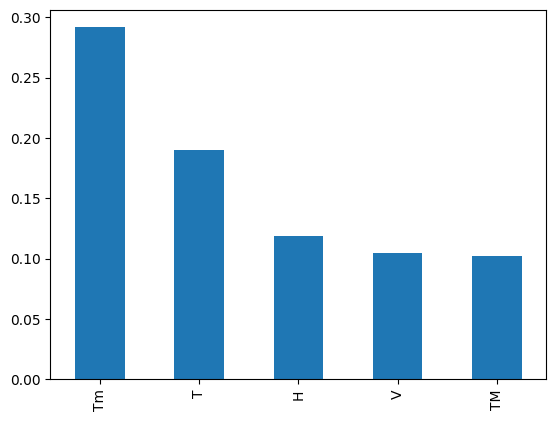

In [23]:
pd.Series(feature_selector.feature_importances_, index=X.columns).nlargest(5).plot(kind='bar')

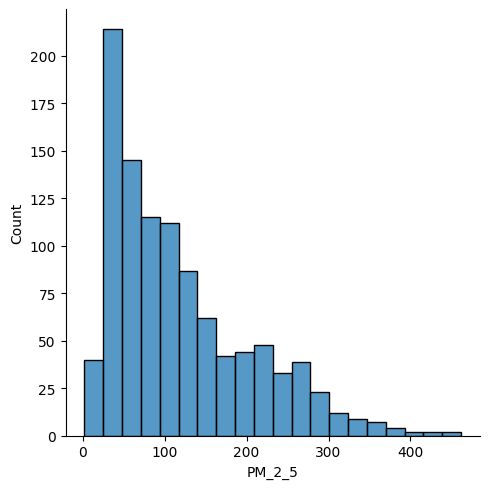

In [25]:
sns.displot(y)

In [26]:
combined_data.to_csv('data/combined_data/cleaned_data.csv', index=None)